In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
df = pd.read_csv('query.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-07-28T08:47:07.112Z,31.702000,-104.171000,6.4075,3.90,ml,32,59.0,0.1000,0.10,...,2025-07-28T09:20:37.619Z,"54 km W of Mentone, Texas",earthquake,0.423967,0.464215,0.100,17.0,reviewed,tx,tx
1,2025-07-28T07:04:13.340Z,40.295334,-124.477997,10.5800,2.74,md,25,271.0,0.1038,0.11,...,2025-07-28T07:47:18.091Z,"17 km W of Petrolia, CA",earthquake,1.950000,0.610000,0.120,26.0,automatic,nc,nc
2,2025-07-27T07:31:52.972Z,31.710000,-104.177000,6.4075,2.90,ml,42,55.0,0.1000,0.20,...,2025-07-27T08:50:31.659Z,"54 km W of Mentone, Texas",earthquake,0.738257,0.651651,0.100,22.0,reviewed,tx,tx
3,2025-07-27T03:39:13.250Z,39.087700,-98.877900,10.0000,2.90,mb_lg,20,59.0,0.6770,0.94,...,2025-07-28T02:02:46.627Z,"4 km SE of Paradise, Kansas",earthquake,2.700000,1.997000,0.045,127.0,reviewed,us,us
4,2025-07-26T12:27:15.654Z,45.864900,-112.394300,10.8960,2.70,ml,36,30.0,0.0590,0.93,...,2025-07-27T23:49:58.174Z,"18 km SE of Butte, Montana",earthquake,1.830000,7.085000,0.045,64.0,reviewed,us,us


In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
def data_type(dataframe):
  for col in dataframe.columns:
    print(f"{col} data type : ",type(dataframe[col][0]))
    print(f"Max values : {dataframe[col].max()} | Min values : {dataframe[col].min()}")

In [ ]:
data_type(df)

time data type :  <class 'str'>
Max values : 2025-07-28T08:47:07.112Z | Min values : 2025-01-01T01:51:40.783Z
latitude data type :  <class 'numpy.float64'>
Max values : 49.6928 | Min values : 25.2496
longitude data type :  <class 'numpy.float64'>
Max values : -69.0799 | Min values : -124.997329711914
depth data type :  <class 'numpy.float64'>
Max values : 45.97 | Min values : -3.42
mag data type :  <class 'numpy.float64'>
Max values : 5.4 | Min values : 2.5
magType data type :  <class 'str'>
Max values : mww | Min values : mb
nst data type :  <class 'numpy.int64'>
Max values : 228 | Min values : 4
gap data type :  <class 'numpy.float64'>
Max values : 358.17999999999995 | Min values : 11.0
dmin data type :  <class 'numpy.float64'>
Max values : 3.082 | Min values : 0.0
rms data type :  <class 'numpy.float64'>
Max values : 1.25 | Min values : 0.0
net data type :  <class 'str'>
Max values : uw | Min values : ci
id data type :  <class 'str'>
Max values : uw62129471 | Min values : ci37543245

#mag [-1,10]
As any magnitude greater than 1 on ritcher scale is an earthquake, but magnitude lesser than 2.5 are not felt, I took the range from 2.5 to max(10)


In [ ]:
df.mag.sample(10)

,mag
540,2.80
881,3.20
1270,2.92
233,2.80
524,4.20
362,3.40
38,2.74
619,3.30
266,2.80
249,2.70


#time (type -> str)
 Times are reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z


In [ ]:
df.time.head(3)

,time
0,2025-07-28T08:47:07.112Z
1,2025-07-28T07:04:13.340Z
2,2025-07-27T07:31:52.972Z


#latitude & longitude (float64)
As I am limiting my region to America, the ranges for longitude and latitude are -
·[24.6, 50] Latitude
·[-125, -65] Longitude

#depth (float64)
Depth is where the earthquake ruptured, reference depth (sea level etc.) depends on the method

when too shallow depths then default  =  33 km


In [ ]:
df.depth.min() , df.depth.max()

(-3.42, 45.97)

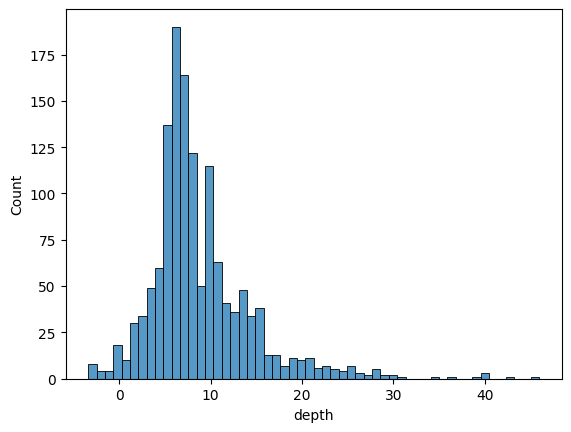

In [ ]:
plt = sns.histplot(data=df, x='depth')

Didn't find a lot of 33km of data, maybe USA has better marking ? Values of 5 or 10 km is also used in mid-continental and mid ocean-ridges.
The Midcontinent Region covers activities in the geographic area of Illinois, Indiana, Kansas, Kentucky, Michigan, Minnesota, Montana, Nebraska, North Dakota.

USA uses a default depth of 10km.

In [ ]:
df.magType.nunique()

7


#mag (float64)
the magnitude of earthquake
The range of magnitude in USA is [2.5, 5.4] between 2025's beginning till now.

#magType (float64)
The ethod used to find the magnitude
Typical Values“Md”, “Ml”, “Ms”, “Mw”, “Me”, “Mi”, “Mb”, “MLg”

In [ ]:
print(df.magType.unique())

['ml' 'md' 'mb_lg' 'mw' 'mwr' 'mb' 'mww']


In [ ]:
df.groupby('magType')['id'].count()

,id
magType,
mb,6
mb_lg,58
md,297
ml,931
mw,54
mwr,24
mww,2


#nst (int64)
Number of seismic stations which were used to find the earthquake location

In [ ]:
df.nst.unique() # uniques values in nst columns

array([ 32,  25,  42,  20,  36,  38,  51,  33,  31,  84, 126, 120,  43,
        12,  11,  68,  21,  34,  24,  83,  98,  56,  27,  30,  71,  14,
        10,  17,  67,  62,  97,  79,   7,  70,  15,  35,  53,  91,  13,
        29,  61,  26,  16,  23,  28,  89,  39,  37,  45,  86,  76,  92,
        60, 135,  72, 106, 110,  73,  69, 122,  59,  64, 129, 133, 146,
        54,  55,  40,  44,   9, 112,  82,  48,  18,   8, 102,   5, 101,
       187, 107, 103,  58,  94,  88,  65, 104,  49,  41,  46,   6,  47,
       111,  52, 123,  50, 109,  96,  78,  74, 128,  22, 185,  63, 130,
       113,  19, 190,  77, 100, 115, 137, 131, 175, 117,  66,  75, 124,
       116,  99,   4,  80, 132, 108, 176, 105, 167,  81, 125, 152,  57,
        87, 184,  90,  85, 150, 119, 213,  95, 140, 149, 127, 134, 168,
       155, 228, 118, 114,  93, 136, 181, 154, 138, 141, 144, 153, 173,
       163, 177, 157, 164, 121, 145])

In [ ]:
!wget https://sera-va3.rm.ingv.it/images/glossaryPics/Figure3.png -O /content/downloaded_image.png

--2025-07-28 10:39:49--  https://sera-va3.rm.ingv.it/images/glossaryPics/Figure3.png
Resolving sera-va3.rm.ingv.it (sera-va3.rm.ingv.it)... 90.147.198.23
Connecting to sera-va3.rm.ingv.it (sera-va3.rm.ingv.it)|90.147.198.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37352 (36K) [image/png]
Saving to: ‘/content/downloaded_image.png’

/content/downloaded 100%[===================>]  36.48K  --.-KB/s    in 0s      

2025-07-28 10:39:50 (228 MB/s) - ‘/content/downloaded_image.png’ saved [37352/37352]



#gap (float64)
Typical Values[0.0, 180.0]
The largest azimuthal gap between azimuthally adjacent stations

Azimuthal =  the direction from an earthquake to the station measured clockwise from north.

Min - Max == 11.0 - 358.17


#type(str)
Can represent 'earthquake' or natural disaster or other causes, I am only taking the earthquake.


In [ ]:
df['type'].unique()

array(['earthquake'], dtype=object)

In [ ]:
df.groupby('type')['id'].count()  # only the type = 'earthquake' exists

,id
type,
earthquake,1372


# magSource (str)
The network that orignally authored the reported magnitude for given event.

In [ ]:
df.groupby('magSource')['id'].count()

,id
magSource,
ci,227
nc,355
nm,8
nn,125
ok,12
se,9
slm,3
tx,309
us,254


# locationSource (str)
The documentation says the same thing about the magSource and locationSource, get back to this -
=============================================
Description
The network that originally authored the reported location of this event.

In [ ]:
df.groupby('locationSource')['id'].count()

,id
locationSource,
ci,227
nc,355
nm,8
nn,125
ok,12
se,9
tx,309
us,257
uu,31


I will go through the df and look for entries where magSource and locationSource if they are the same then it is a repeated column otherwise different.

Only three such entries exist.

In [ ]:
df[df.magSource != df.locationSource]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
214,2025-06-18T11:56:58.428Z,32.2779,-103.2947,4.506,3.4,mwr,37,91.0,0.249,0.42,...,2025-07-06T07:19:02.040Z,"20 km NNW of Jal, New Mexico",earthquake,2.31,7.654,NaN,15.0,reviewed,us,slm
327,2025-06-06T02:35:09.418Z,44.3221,-114.9948,10.000,3.3,mwr,27,60.0,0.241,0.72,...,2025-06-26T21:15:49.226Z,"12 km NNW of Stanley, Idaho",earthquake,2.60,2.010,NaN,11.0,reviewed,us,slm
546,2025-05-08T18:24:10.570Z,32.2727,-103.2874,4.637,3.3,mwr,45,58.0,0.254,0.63,...,2025-07-24T21:30:12.040Z,"19 km NNW of Jal, New Mexico",earthquake,2.37,7.420,NaN,19.0,reviewed,us,slm


# status (float64)

Types =  ['reviewed', 'automatic']

reviewd => A human has watched it (HUMAN VERIFIED)

autimatic => done by processing systems(NOT HUMAN VERIFIED)

In [ ]:
df.status.unique()

array(['reviewed', 'automatic'], dtype=object)

In [ ]:
df.groupby('status')['id'].count() # Majority of earthquakes have been reviewd by humans.

,id
status,
automatic,28
reviewed,1344


# dmin (float64)
Horizontal distance from the epicenter to the nearest station (in degrees).

1 degree is approximately 111.2 kilometers.

In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

In this dataset, range for dmin is [0,3.082]


In [ ]:
df[df.dmin == 0]['dmin'].count()

np.int64(193)

# rms (float64)


root mean square of seimic strength signal within a given time window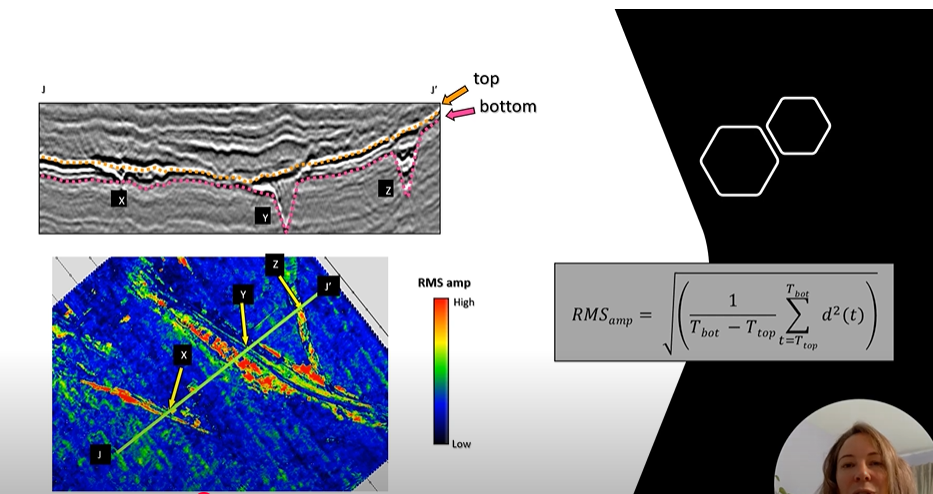

#net (str)
The ID of a data contributor.

Identifies the network considered to be source of information for this event

In [ ]:
df['net'].unique()

array(['tx', 'nc', 'us', 'ci', 'nn', 'ok', 'uu', 'se', 'nm', 'uw'],
      dtype=object)

# id(str)
A unique identifier for the event. This is the current preferred id for the event, and may change over time.

In [ ]:
df['id'].nunique()

1372

# place (str)
name of the region where event occured, can be normal text name.

In [ ]:
df['place'].nunique()

866

In [ ]:
df['place'].sample(10)# if gonna extract name = everything after comma

,place
959,"51 km WNW of Petrolia, CA"
434,"31 km S of Scenic, Arizona"
389,"15 km NNW of Stanley, Idaho"
59,"68 km NNW of Rachel, Nevada"
329,"13 km WSW of Delta, B.C., MX"
819,"32 km S of Scenic, Arizona"
175,"10 km NW of Woodston, Kansas"
118,"54 km NW of Toyah, Texas"
325,"13 km NNW of Stanley, Idaho"
101,"5 km WSW of Loyola, CA"


# updated (str)

Time when the event was most recently updated.

Times are reported in milliseconds since the epoch.

In [ ]:
df['updated']

,updated
0,2025-07-28T09:20:37.619Z
1,2025-07-28T07:47:18.091Z
2,2025-07-27T08:50:31.659Z
3,2025-07-28T02:02:46.627Z
4,2025-07-27T23:49:58.174Z
...,...
1367,2025-03-17T21:34:03.040Z
1368,2025-03-17T21:34:01.040Z
1369,2025-03-17T21:34:01.040Z
1370,2025-03-17T21:34:00.040Z


# magNst (float64)
## should be int?

The total number of seismic stations used to calculate the magnitude for this earthquake.

In [ ]:
df['magNst'].sample(5)

,magNst
61,22.0
781,4.0
346,138.0
813,19.0
864,36.0


# !!Note ->

Nst for finding the earthquake's location

magNst for finding the earthquake's magnitude